In [8]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy

In [9]:
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt')
df.head()

,personID,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [10]:
dbname = ''
db = ''

for i, (g, gdf) in enumerate(df.groupby('personID')):
    # only work with the data for the personID 33
    if g==33:
        dbname, db = g, gdf
        break

In [11]:
print "PERSON {}".format(dbname)
print db.head()

PERSON 33
   personID activity            time         x          y         z
0        33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1        33  Jogging  49106062271000  5.012288  11.264028  0.953424
2        33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3        33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4        33  Jogging  49106332290000 -1.184970  12.108489  7.205164


In [12]:
db.time

0     49105962326000
1     49106062271000
2     49106112167000
3     49106222305000
4     49106332290000
5     49106442306000
6     49106542312000
7     49106652389000
8     49106762313000
9     49106872299000
10    49106982315000
11    49107092330000
12    49107202316000
13    49107312332000
14    49107422348000
...
64590    11245732250000
64591    11245782451000
64592    11245832286000
64593    11245882457000
64594    11245932262000
64595    11245982494000
64596    11246032268000
64597    11246082561000
64598    11246132274000
64599    11246182475000
64600    11246232280000
64601    11246282390000
64602    11246332774000
64603    11246382304000
64604    11246442271000
Name: time, Length: 23142, dtype: int64

In [13]:
#calculate framerate = number of samples / time = 
n = 100
db.time.diff()

0           NaN
1      99945000
2      49896000
3     110138000
4     109985000
5     110016000
6     100006000
7     110077000
8     109924000
9     109986000
10    110016000
11    110015000
12    109986000
13    110016000
14    110016000
...
64590    49805000
64591    50201000
64592    49835000
64593    50171000
64594    49805000
64595    50232000
64596    49774000
64597    50293000
64598    49713000
64599    50201000
64600    49805000
64601    50110000
64602    50384000
64603    49530000
64604    59967000
Name: time, Length: 23142, dtype: float64

### Visualize Wave for a Segment

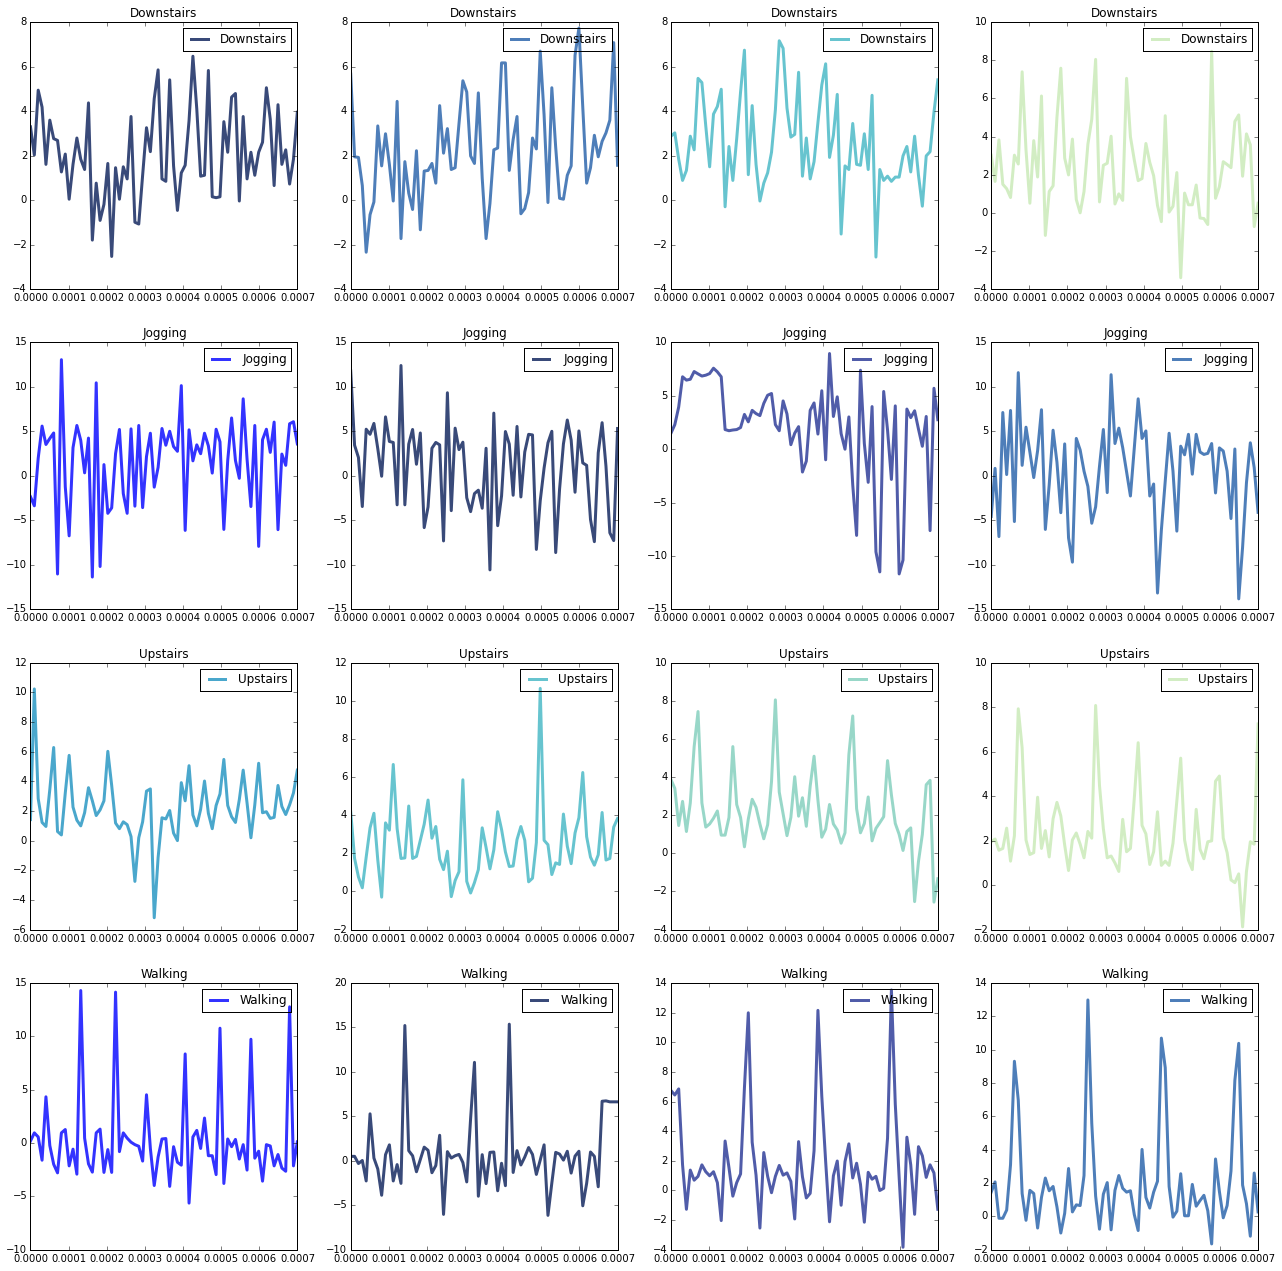

In [14]:
# Get ready to plot 2 subplots as a 4x2 grid, where a subplot is a set of activities
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=g)
        thinkplot.Config(title=g)

### Visualize Spectrums for a Segment

10
10
21
9
9
5
6
22
5
20
20
31
27
27
19
19


c:\Users\mmccauley\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


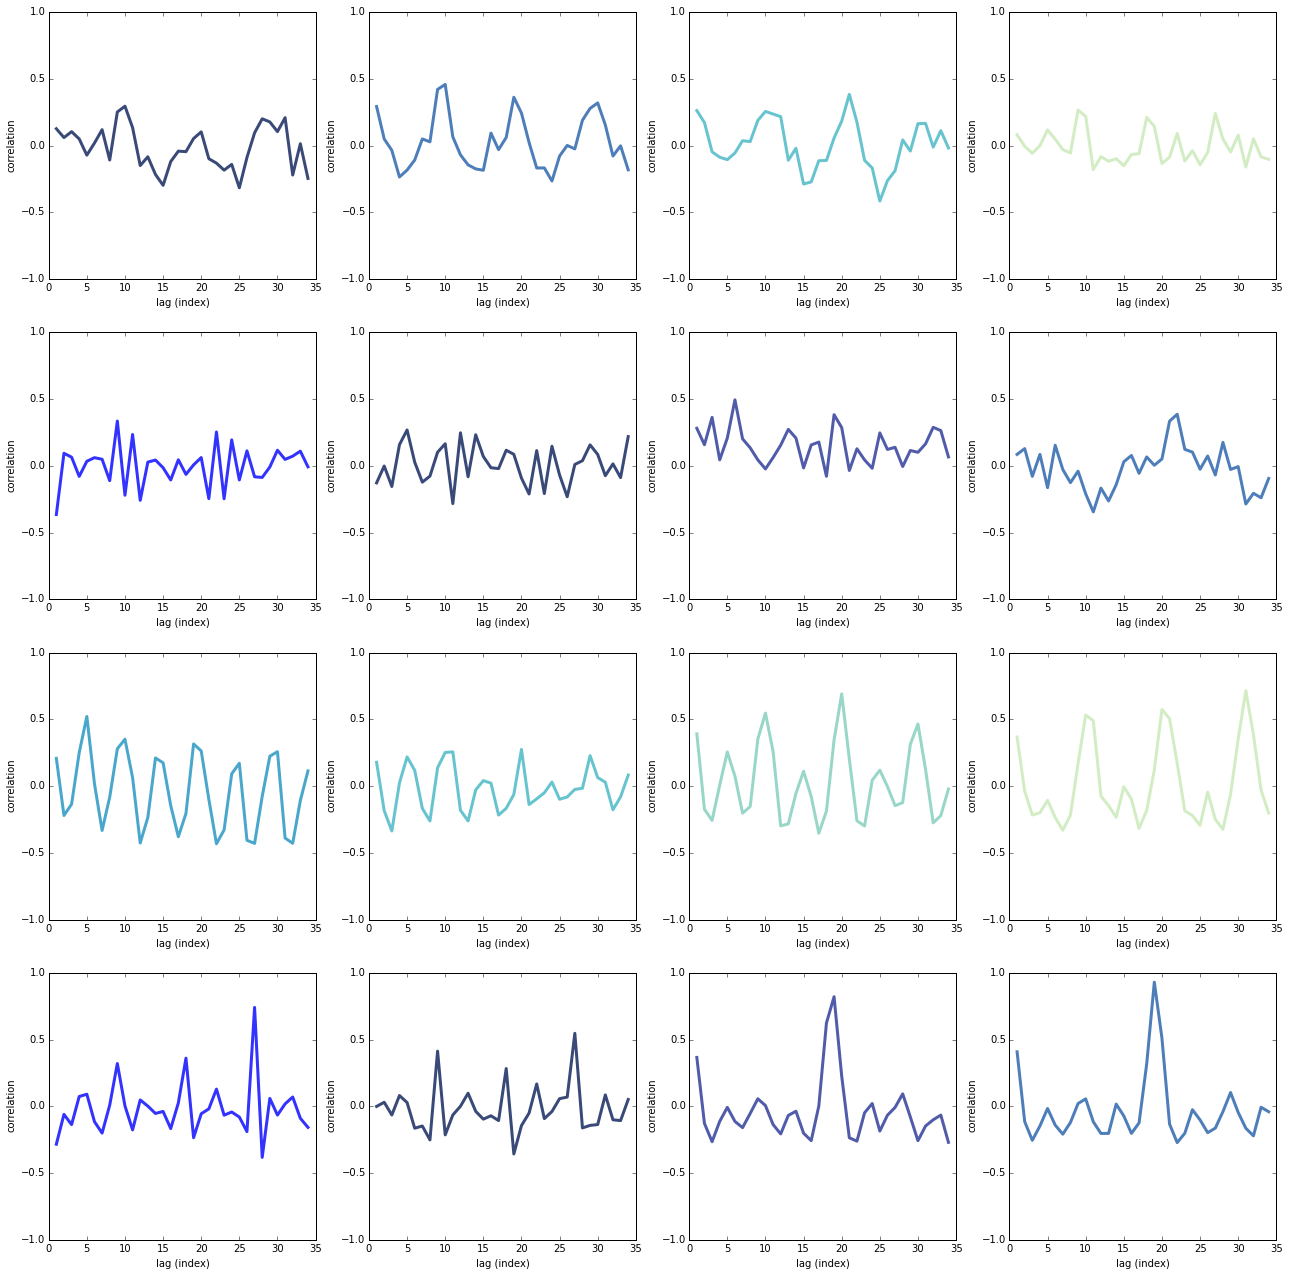

In [15]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    matrix = []
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        
        ## Creating a matrix of fundamental frequencies from the spectrum
        
        #zseg.unbias()
        #spectrum = zseg.make_spectrum()
        #auto_zwave = autocorr.autocorr(zwave)
        #auto_zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        
        thinkplot.subplot(4*plotnum+1+i)
        
        ## Using example code from chap05
        lags, corrs = autocorr.autocorr(zseg)
        thinkplot.plot(lags[1:len(lags)], corrs[1:len(corrs)])
        thinkplot.config(xlabel='lag (index)', ylabel='correlation', ylim=[-1, 1])
        
        ## Getting the dominant frequencies
        dominant_freqs= numpy.argmax(corrs[1:len(corrs)])+1
        #argmax() gets the maximum, [1:len(corrs)] cuts off the intial 0 peak and +1 fixes the indices back to the correct place
        
        print dominant_freqs
        
        #zseg.plot(label=g)
        #thinkplot.Config(title=g)
        
        # framerate times indice equals time period
        #100000*19 = 190000

In [28]:
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)

start0 = 0.01
window_size = 0.0007
    
zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
    
matrix = []

def find_dominant(zseg):
    lags, corrs = autocorr.autocorr(zseg)
    #argmax() gets the maximum, [1:len(corrs)] cuts off the intial 0 peak and +1 fixes the indices back to the correct place
    dom_freq_index = numpy.argmax(corrs[1:len(corrs)])+1
    period = dom_freq_index/zseg.framerate
    dom_freq = 1/period
    return dom_freq
find_dominant(zseg)

5263.1578947368416

In [17]:
period = (19/100000)
freq = 1/period

Above are spectrums of the four activities at four consecutive windows. For going up and down the stairs, the spectrums across the four windows are relatively similar. However, walking and jogging have some discrepancies, possibly due to the fact that the time increments are not consistent.

### Plot Power for Segments

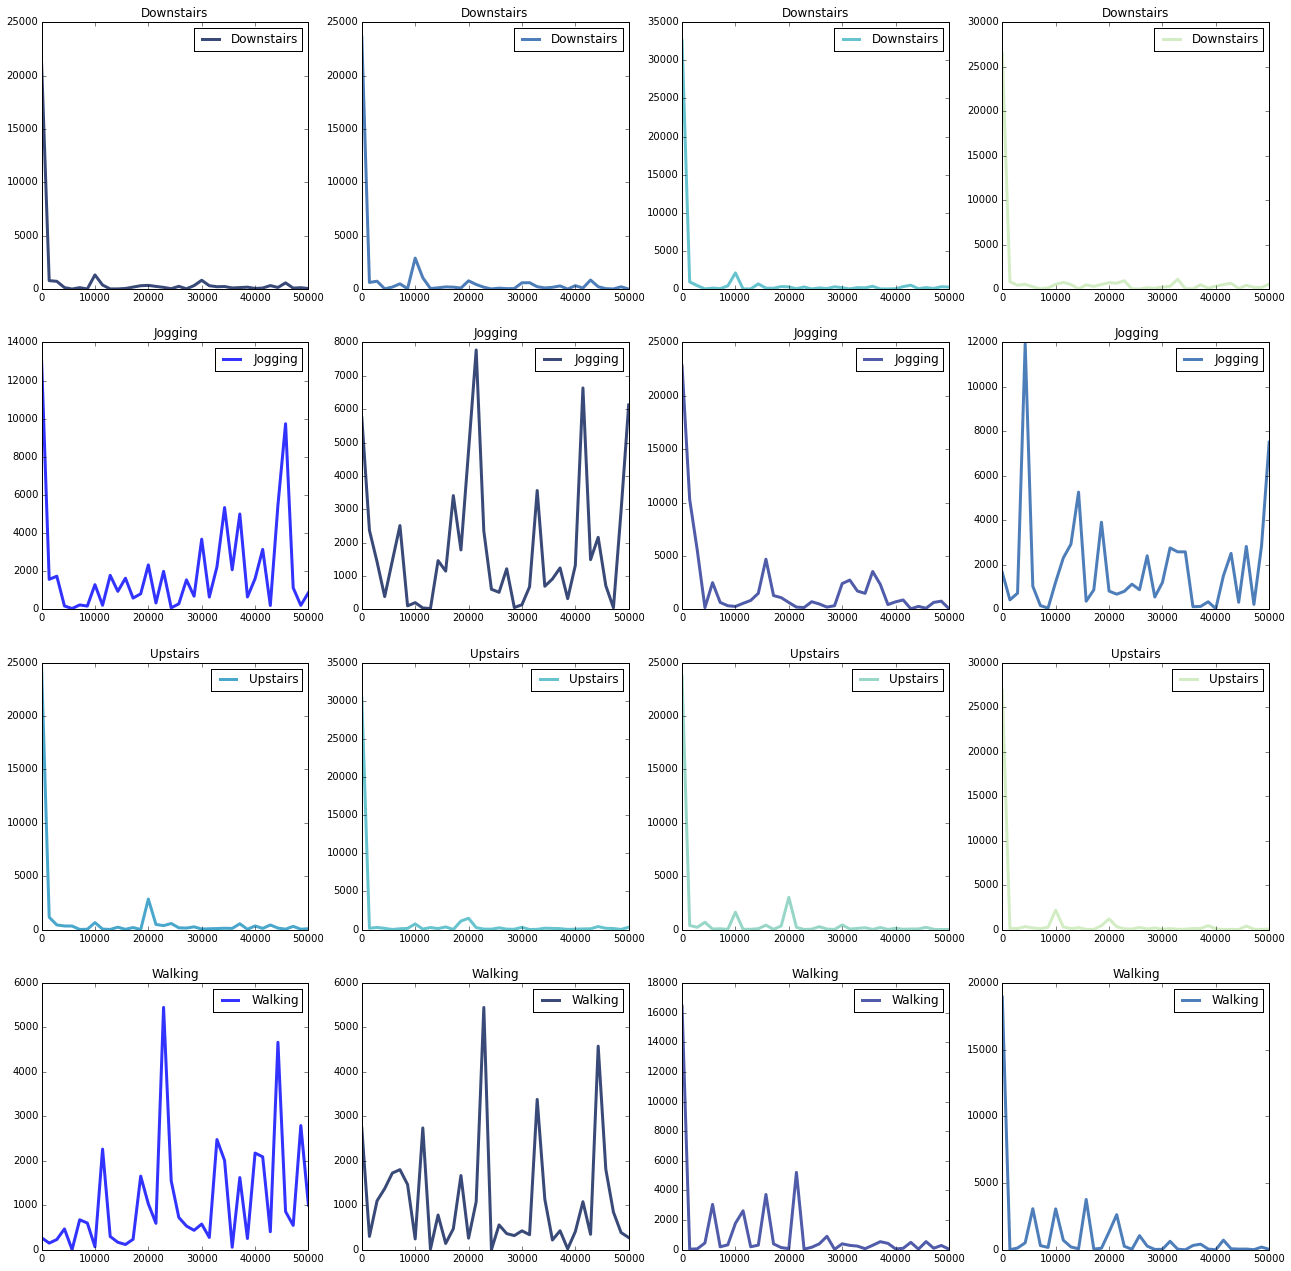

In [18]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        spectrum = zseg.make_spectrum()
        thinkplot.subplot(4*plotnum+1+i)
        spectrum.plot_power(label=g)
        thinkplot.Config(title=g)

### Plot Phases for Segments

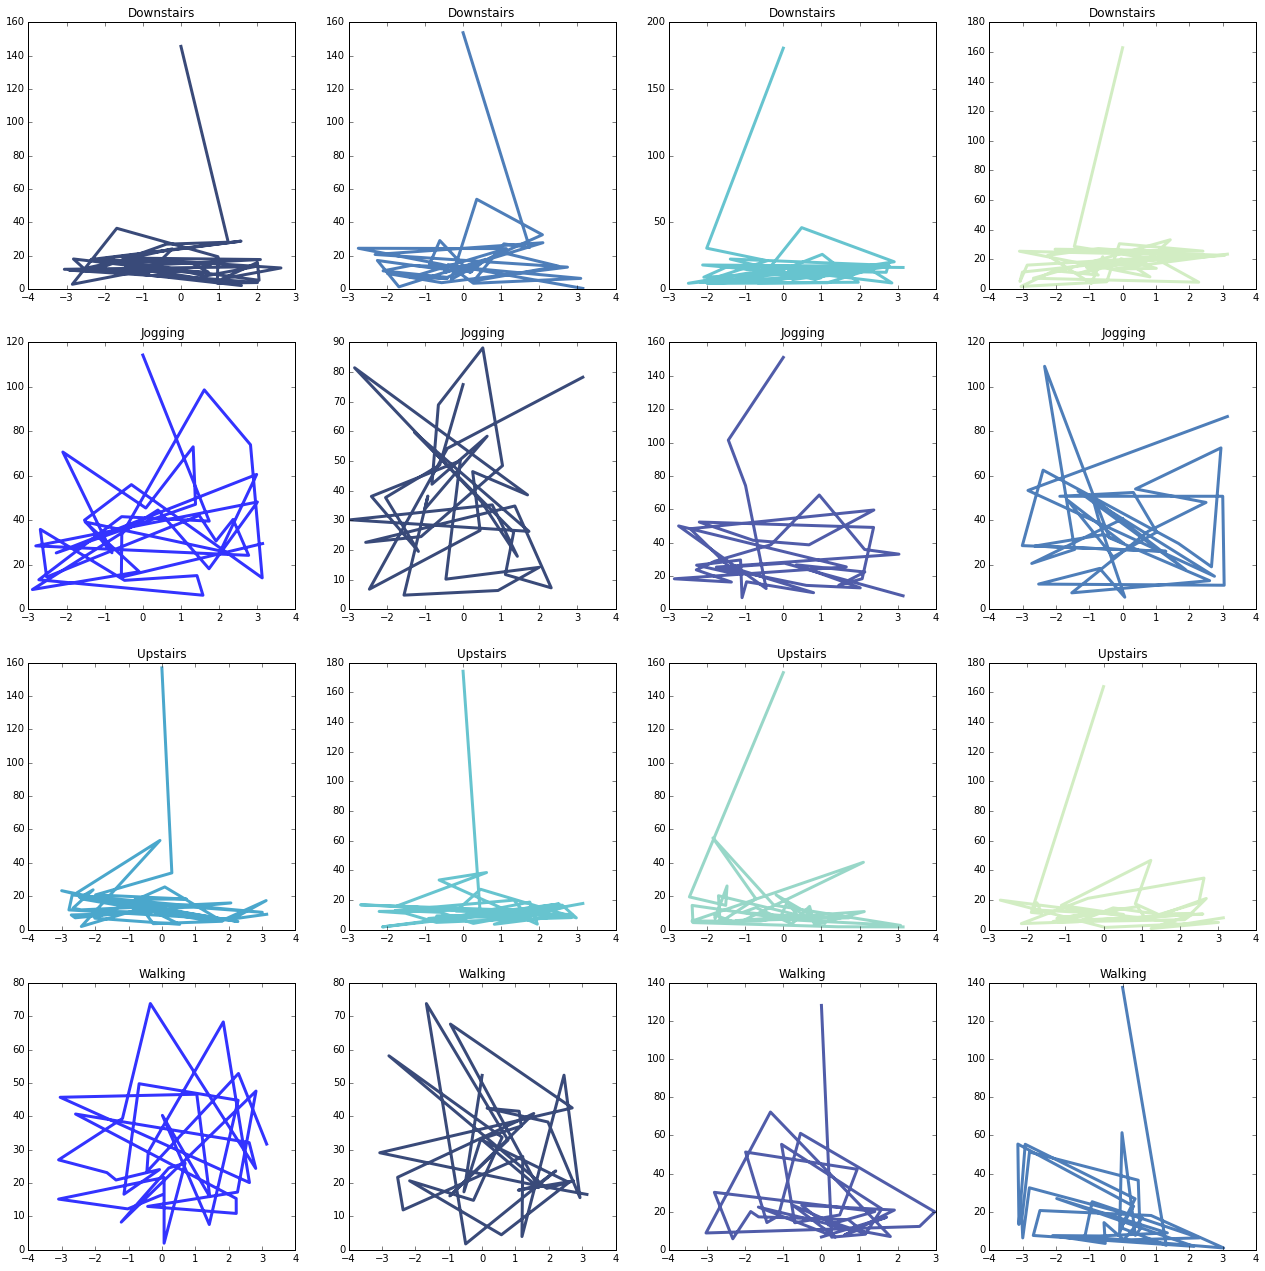

In [19]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        spectrum = zseg.make_spectrum()
        thinkplot.subplot(4*plotnum+1+i)
        thinkplot.plot(spectrum.angles(), spectrum.amps)
        thinkplot.Config(title=g)

##TODOS:

- phone accelerometer
- timeseries spacing
- feature visualization / extraction
    - phase (WIP)
    - frequency bins
    - n most dominant frequencies
- machine learning pipeline building
    - Hidden Markov Model
- Allen says...
    - unbias the signal before FFTing
    - use thinkdsp.peaks() to pull the highest peaks (returns index, good for dominant)
    - possibly try autocorrelation and compare to FFT
    
##DONE:

- feature visualization / extraction
    - timeseries
    - frequency spectrum
    - power spectrum